In [13]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [14]:
env = gym.make("MountainCar-v0").env

action_space = env.action_space.n
print("Action space:", action_space)

Action space: 3


In [15]:
class Agent():
    def __init__(self, epsilon, position_min, position_max, speed_min, speed_max, alpha, gamma, sarsa=False):
        
        self.q_table = {}
        self.epsilon = epsilon
        self.sarsa = sarsa
        
        self.discount_factor = gamma
        self.alpha = alpha

        self.position_bins = np.linspace(position_min, position_max, 30)
        self.speed_bins = np.linspace(speed_min, speed_max, 30)

        # populate the q_table
        for pos in self.position_bins:
            for spd in self.speed_bins:
                self.q_table[(pos, spd)] = [0 for _ in range(action_space)]

    def get_state_digitized(self, state):
        pos_dig_i = np.digitize(state[0], self.position_bins)
        pos_dig = self.position_bins[pos_dig_i]

        speed_dig_i = np.digitize(state[1], self.speed_bins)
        speed_dig = self.speed_bins[speed_dig_i]
        return pos_dig, speed_dig

    def get_greedy_action(self, state):
        pos, spd = self.get_state_digitized(state)
        greedy_action = np.argmax(self.q_table[(pos, spd)])
        return greedy_action 

    def get_max_qvalue(self, state):
        pos, spd = self.get_state_digitized(state)
        max_qvalue = np.max(self.q_table[(pos, spd)])
        return max_qvalue 
    
    def get_qvalue(self, state, action):
        pos, spd = self.get_state_digitized(state)
        qvalue = self.q_table[(pos, spd)][action]
        return qvalue 

    def e_greedy_policy(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(action_space)
        else:
            action = self.get_greedy_action(state) 
        return action
    
    def td_control(self, state, action, new_state, reward, done):
        not_done = 1 - done
        
        if self.sarsa:
            target = reward + self.discount_factor*self.get_qvalue(new_state, action)
            q_value = self.get_qvalue(state, action)
            new_q_value = q_value + self.alpha*(target - q_value)*not_done
        else:
            q_target = reward + self.discount_factor*self.get_max_qvalue(new_state)
            q_value = self.get_qvalue(state, action)
            new_q_value = q_value + self.alpha*(q_target - q_value)*not_done

        # update table
        self.set_qvalue(state, action, new_q_value)

            
    def set_qvalue(self, state, action, value):
        pos, spd = self.get_state_digitized(state)
        self.q_table[(pos, spd)][action] = value

In [16]:
epsilon_init = 0.8
epsilon_end = 0.1
alpha = 0.5
discount_factor = 0.99

agent = Agent(epsilon_init, env.min_position, env.max_position, -env.max_speed, env.max_speed, alpha=alpha, gamma=discount_factor, sarsa=True)

In [17]:
state = env.reset()
print(state)

[-0.41379442  0.        ]


In [18]:
#st = [-1.3, -0.07]
#agent.set_qvalue(st, 2, 7 )

In [19]:
for keys,values in agent.q_table.items():
    print(keys, " \t", values)
#    print(values)

(-1.2, -0.07)  	 [0, 0, 0]
(-1.2, -0.06517241379310346)  	 [0, 0, 0]
(-1.2, -0.060344827586206906)  	 [0, 0, 0]
(-1.2, -0.05551724137931035)  	 [0, 0, 0]
(-1.2, -0.0506896551724138)  	 [0, 0, 0]
(-1.2, -0.04586206896551725)  	 [0, 0, 0]
(-1.2, -0.04103448275862069)  	 [0, 0, 0]
(-1.2, -0.03620689655172414)  	 [0, 0, 0]
(-1.2, -0.03137931034482759)  	 [0, 0, 0]
(-1.2, -0.02655172413793104)  	 [0, 0, 0]
(-1.2, -0.02172413793103449)  	 [0, 0, 0]
(-1.2, -0.016896551724137933)  	 [0, 0, 0]
(-1.2, -0.012068965517241383)  	 [0, 0, 0]
(-1.2, -0.007241379310344825)  	 [0, 0, 0]
(-1.2, -0.002413793103448275)  	 [0, 0, 0]
(-1.2, 0.002413793103448275)  	 [0, 0, 0]
(-1.2, 0.007241379310344825)  	 [0, 0, 0]
(-1.2, 0.012068965517241376)  	 [0, 0, 0]
(-1.2, 0.016896551724137926)  	 [0, 0, 0]
(-1.2, 0.021724137931034476)  	 [0, 0, 0]
(-1.2, 0.026551724137931026)  	 [0, 0, 0]
(-1.2, 0.03137931034482759)  	 [0, 0, 0]
(-1.2, 0.03620689655172414)  	 [0, 0, 0]
(-1.2, 0.04103448275862069)  	 [0, 0, 0]
(-1.2,

In [20]:
#agent.get_greedy_action(st)

In [21]:
import math
def train(n_epochs=200):
    epsilon_discount = (epsilon_init - epsilon_end)/n_epochs
    
    rewards_history = []
    for epoch in range(n_epochs):

        state = env.reset()
        done = False
        reward_sum = 0

        while not done:
            action = agent.e_greedy_policy(state)
            new_state, reward, done, info = env.step(action)

            reward_sum += reward
            
            # Q-learning
            #not_done = 1 - done
            #q_target = reward + discount_factor*agent.get_max_qvalue(new_state)
            #q_value = agent.get_qvalue(state, action)
            ##q_value = 1
            #new_q_value = q_value + alpha*(q_target - q_value)*not_done
            agent.td_control(state, action, new_state, reward, done)
            
            #print(reward)
            #print(state)
            #print(q_value)
            #print(q_target)
            #print(new_q_value)
            #l
            
            #if math.isnan(new_q_value) == True:
            #if new_q_value > 1000:
            #    print(state)
            #    print(q_value)
            #    print(q_target)
            #    print(new_q_value)
            #    l
            
            #agent.set_qvalue(state, action, new_q_value)
            
            
            state = new_state
        rewards_history.append(reward_sum)
        print("Epoch={}\t reward={}\t epsilon={:.4f}".format(epoch, reward_sum, agent.epsilon))
        
        agent.epsilon -= epsilon_discount
    return rewards_history

In [22]:
rewards = train(n_epochs=2000)

Epoch=0	 reward=-21098.0	 epsilon=0.8000
Epoch=1	 reward=-5487.0	 epsilon=0.7997
Epoch=2	 reward=-8331.0	 epsilon=0.7993
Epoch=3	 reward=-2183.0	 epsilon=0.7990
Epoch=4	 reward=-1205.0	 epsilon=0.7986
Epoch=5	 reward=-3490.0	 epsilon=0.7983
Epoch=6	 reward=-1369.0	 epsilon=0.7979
Epoch=7	 reward=-945.0	 epsilon=0.7976
Epoch=8	 reward=-1174.0	 epsilon=0.7972
Epoch=9	 reward=-2311.0	 epsilon=0.7969
Epoch=10	 reward=-1455.0	 epsilon=0.7965
Epoch=11	 reward=-657.0	 epsilon=0.7962
Epoch=12	 reward=-2894.0	 epsilon=0.7958
Epoch=13	 reward=-807.0	 epsilon=0.7955
Epoch=14	 reward=-1473.0	 epsilon=0.7951
Epoch=15	 reward=-1597.0	 epsilon=0.7948
Epoch=16	 reward=-2286.0	 epsilon=0.7944
Epoch=17	 reward=-577.0	 epsilon=0.7941
Epoch=18	 reward=-707.0	 epsilon=0.7937
Epoch=19	 reward=-849.0	 epsilon=0.7934
Epoch=20	 reward=-919.0	 epsilon=0.7930
Epoch=21	 reward=-582.0	 epsilon=0.7927
Epoch=22	 reward=-906.0	 epsilon=0.7923
Epoch=23	 reward=-770.0	 epsilon=0.7920
Epoch=24	 reward=-1650.0	 epsilon=0

Epoch=201	 reward=-514.0	 epsilon=0.7297
Epoch=202	 reward=-474.0	 epsilon=0.7293
Epoch=203	 reward=-750.0	 epsilon=0.7290
Epoch=204	 reward=-323.0	 epsilon=0.7286
Epoch=205	 reward=-821.0	 epsilon=0.7283
Epoch=206	 reward=-579.0	 epsilon=0.7279
Epoch=207	 reward=-523.0	 epsilon=0.7276
Epoch=208	 reward=-491.0	 epsilon=0.7272
Epoch=209	 reward=-743.0	 epsilon=0.7269
Epoch=210	 reward=-453.0	 epsilon=0.7265
Epoch=211	 reward=-481.0	 epsilon=0.7262
Epoch=212	 reward=-594.0	 epsilon=0.7258
Epoch=213	 reward=-462.0	 epsilon=0.7255
Epoch=214	 reward=-554.0	 epsilon=0.7251
Epoch=215	 reward=-585.0	 epsilon=0.7248
Epoch=216	 reward=-506.0	 epsilon=0.7244
Epoch=217	 reward=-1073.0	 epsilon=0.7241
Epoch=218	 reward=-715.0	 epsilon=0.7237
Epoch=219	 reward=-648.0	 epsilon=0.7234
Epoch=220	 reward=-869.0	 epsilon=0.7230
Epoch=221	 reward=-736.0	 epsilon=0.7227
Epoch=222	 reward=-1167.0	 epsilon=0.7223
Epoch=223	 reward=-900.0	 epsilon=0.7220
Epoch=224	 reward=-700.0	 epsilon=0.7216
Epoch=225	 rew

Epoch=402	 reward=-437.0	 epsilon=0.6593
Epoch=403	 reward=-483.0	 epsilon=0.6590
Epoch=404	 reward=-429.0	 epsilon=0.6586
Epoch=405	 reward=-586.0	 epsilon=0.6583
Epoch=406	 reward=-401.0	 epsilon=0.6579
Epoch=407	 reward=-422.0	 epsilon=0.6576
Epoch=408	 reward=-463.0	 epsilon=0.6572
Epoch=409	 reward=-611.0	 epsilon=0.6569
Epoch=410	 reward=-381.0	 epsilon=0.6565
Epoch=411	 reward=-583.0	 epsilon=0.6562
Epoch=412	 reward=-549.0	 epsilon=0.6558
Epoch=413	 reward=-416.0	 epsilon=0.6555
Epoch=414	 reward=-590.0	 epsilon=0.6551
Epoch=415	 reward=-722.0	 epsilon=0.6548
Epoch=416	 reward=-866.0	 epsilon=0.6544
Epoch=417	 reward=-794.0	 epsilon=0.6541
Epoch=418	 reward=-547.0	 epsilon=0.6537
Epoch=419	 reward=-721.0	 epsilon=0.6534
Epoch=420	 reward=-595.0	 epsilon=0.6530
Epoch=421	 reward=-236.0	 epsilon=0.6527
Epoch=422	 reward=-749.0	 epsilon=0.6523
Epoch=423	 reward=-634.0	 epsilon=0.6520
Epoch=424	 reward=-473.0	 epsilon=0.6516
Epoch=425	 reward=-625.0	 epsilon=0.6513
Epoch=426	 rewar

Epoch=606	 reward=-591.0	 epsilon=0.5879
Epoch=607	 reward=-590.0	 epsilon=0.5876
Epoch=608	 reward=-504.0	 epsilon=0.5872
Epoch=609	 reward=-745.0	 epsilon=0.5869
Epoch=610	 reward=-492.0	 epsilon=0.5865
Epoch=611	 reward=-740.0	 epsilon=0.5862
Epoch=612	 reward=-517.0	 epsilon=0.5858
Epoch=613	 reward=-483.0	 epsilon=0.5855
Epoch=614	 reward=-331.0	 epsilon=0.5851
Epoch=615	 reward=-472.0	 epsilon=0.5848
Epoch=616	 reward=-399.0	 epsilon=0.5844
Epoch=617	 reward=-350.0	 epsilon=0.5841
Epoch=618	 reward=-452.0	 epsilon=0.5837
Epoch=619	 reward=-597.0	 epsilon=0.5834
Epoch=620	 reward=-456.0	 epsilon=0.5830
Epoch=621	 reward=-463.0	 epsilon=0.5827
Epoch=622	 reward=-563.0	 epsilon=0.5823
Epoch=623	 reward=-446.0	 epsilon=0.5820
Epoch=624	 reward=-508.0	 epsilon=0.5816
Epoch=625	 reward=-368.0	 epsilon=0.5813
Epoch=626	 reward=-445.0	 epsilon=0.5809
Epoch=627	 reward=-586.0	 epsilon=0.5806
Epoch=628	 reward=-477.0	 epsilon=0.5802
Epoch=629	 reward=-561.0	 epsilon=0.5799
Epoch=630	 rewar

Epoch=810	 reward=-493.0	 epsilon=0.5165
Epoch=811	 reward=-624.0	 epsilon=0.5162
Epoch=812	 reward=-536.0	 epsilon=0.5158
Epoch=813	 reward=-388.0	 epsilon=0.5155
Epoch=814	 reward=-439.0	 epsilon=0.5151
Epoch=815	 reward=-379.0	 epsilon=0.5148
Epoch=816	 reward=-345.0	 epsilon=0.5144
Epoch=817	 reward=-561.0	 epsilon=0.5141
Epoch=818	 reward=-508.0	 epsilon=0.5137
Epoch=819	 reward=-488.0	 epsilon=0.5134
Epoch=820	 reward=-421.0	 epsilon=0.5130
Epoch=821	 reward=-404.0	 epsilon=0.5127
Epoch=822	 reward=-294.0	 epsilon=0.5123
Epoch=823	 reward=-431.0	 epsilon=0.5120
Epoch=824	 reward=-765.0	 epsilon=0.5116
Epoch=825	 reward=-381.0	 epsilon=0.5113
Epoch=826	 reward=-432.0	 epsilon=0.5109
Epoch=827	 reward=-445.0	 epsilon=0.5106
Epoch=828	 reward=-495.0	 epsilon=0.5102
Epoch=829	 reward=-296.0	 epsilon=0.5099
Epoch=830	 reward=-422.0	 epsilon=0.5095
Epoch=831	 reward=-545.0	 epsilon=0.5092
Epoch=832	 reward=-493.0	 epsilon=0.5088
Epoch=833	 reward=-504.0	 epsilon=0.5085
Epoch=834	 rewar

Epoch=1012	 reward=-707.0	 epsilon=0.4458
Epoch=1013	 reward=-672.0	 epsilon=0.4455
Epoch=1014	 reward=-439.0	 epsilon=0.4451
Epoch=1015	 reward=-644.0	 epsilon=0.4448
Epoch=1016	 reward=-359.0	 epsilon=0.4444
Epoch=1017	 reward=-506.0	 epsilon=0.4441
Epoch=1018	 reward=-496.0	 epsilon=0.4437
Epoch=1019	 reward=-286.0	 epsilon=0.4434
Epoch=1020	 reward=-698.0	 epsilon=0.4430
Epoch=1021	 reward=-510.0	 epsilon=0.4427
Epoch=1022	 reward=-488.0	 epsilon=0.4423
Epoch=1023	 reward=-462.0	 epsilon=0.4420
Epoch=1024	 reward=-439.0	 epsilon=0.4416
Epoch=1025	 reward=-519.0	 epsilon=0.4413
Epoch=1026	 reward=-530.0	 epsilon=0.4409
Epoch=1027	 reward=-586.0	 epsilon=0.4406
Epoch=1028	 reward=-436.0	 epsilon=0.4402
Epoch=1029	 reward=-745.0	 epsilon=0.4399
Epoch=1030	 reward=-460.0	 epsilon=0.4395
Epoch=1031	 reward=-615.0	 epsilon=0.4392
Epoch=1032	 reward=-583.0	 epsilon=0.4388
Epoch=1033	 reward=-518.0	 epsilon=0.4385
Epoch=1034	 reward=-460.0	 epsilon=0.4381
Epoch=1035	 reward=-635.0	 epsilon

Epoch=1214	 reward=-384.0	 epsilon=0.3751
Epoch=1215	 reward=-280.0	 epsilon=0.3748
Epoch=1216	 reward=-321.0	 epsilon=0.3744
Epoch=1217	 reward=-353.0	 epsilon=0.3741
Epoch=1218	 reward=-403.0	 epsilon=0.3737
Epoch=1219	 reward=-383.0	 epsilon=0.3734
Epoch=1220	 reward=-421.0	 epsilon=0.3730
Epoch=1221	 reward=-409.0	 epsilon=0.3727
Epoch=1222	 reward=-359.0	 epsilon=0.3723
Epoch=1223	 reward=-352.0	 epsilon=0.3720
Epoch=1224	 reward=-342.0	 epsilon=0.3716
Epoch=1225	 reward=-319.0	 epsilon=0.3713
Epoch=1226	 reward=-381.0	 epsilon=0.3709
Epoch=1227	 reward=-706.0	 epsilon=0.3706
Epoch=1228	 reward=-438.0	 epsilon=0.3702
Epoch=1229	 reward=-639.0	 epsilon=0.3699
Epoch=1230	 reward=-363.0	 epsilon=0.3695
Epoch=1231	 reward=-401.0	 epsilon=0.3692
Epoch=1232	 reward=-346.0	 epsilon=0.3688
Epoch=1233	 reward=-306.0	 epsilon=0.3685
Epoch=1234	 reward=-463.0	 epsilon=0.3681
Epoch=1235	 reward=-415.0	 epsilon=0.3678
Epoch=1236	 reward=-667.0	 epsilon=0.3674
Epoch=1237	 reward=-445.0	 epsilon

Epoch=1410	 reward=-305.0	 epsilon=0.3065
Epoch=1411	 reward=-447.0	 epsilon=0.3062
Epoch=1412	 reward=-325.0	 epsilon=0.3058
Epoch=1413	 reward=-468.0	 epsilon=0.3055
Epoch=1414	 reward=-333.0	 epsilon=0.3051
Epoch=1415	 reward=-319.0	 epsilon=0.3048
Epoch=1416	 reward=-270.0	 epsilon=0.3044
Epoch=1417	 reward=-488.0	 epsilon=0.3041
Epoch=1418	 reward=-377.0	 epsilon=0.3037
Epoch=1419	 reward=-371.0	 epsilon=0.3034
Epoch=1420	 reward=-246.0	 epsilon=0.3030
Epoch=1421	 reward=-339.0	 epsilon=0.3027
Epoch=1422	 reward=-376.0	 epsilon=0.3023
Epoch=1423	 reward=-422.0	 epsilon=0.3020
Epoch=1424	 reward=-477.0	 epsilon=0.3016
Epoch=1425	 reward=-333.0	 epsilon=0.3013
Epoch=1426	 reward=-537.0	 epsilon=0.3009
Epoch=1427	 reward=-302.0	 epsilon=0.3006
Epoch=1428	 reward=-339.0	 epsilon=0.3002
Epoch=1429	 reward=-292.0	 epsilon=0.2999
Epoch=1430	 reward=-319.0	 epsilon=0.2995
Epoch=1431	 reward=-476.0	 epsilon=0.2992
Epoch=1432	 reward=-352.0	 epsilon=0.2988
Epoch=1433	 reward=-338.0	 epsilon

Epoch=1612	 reward=-230.0	 epsilon=0.2358
Epoch=1613	 reward=-240.0	 epsilon=0.2355
Epoch=1614	 reward=-254.0	 epsilon=0.2351
Epoch=1615	 reward=-309.0	 epsilon=0.2348
Epoch=1616	 reward=-177.0	 epsilon=0.2344
Epoch=1617	 reward=-313.0	 epsilon=0.2341
Epoch=1618	 reward=-316.0	 epsilon=0.2337
Epoch=1619	 reward=-237.0	 epsilon=0.2334
Epoch=1620	 reward=-239.0	 epsilon=0.2330
Epoch=1621	 reward=-298.0	 epsilon=0.2327
Epoch=1622	 reward=-212.0	 epsilon=0.2323
Epoch=1623	 reward=-284.0	 epsilon=0.2320
Epoch=1624	 reward=-259.0	 epsilon=0.2316
Epoch=1625	 reward=-233.0	 epsilon=0.2313
Epoch=1626	 reward=-258.0	 epsilon=0.2309
Epoch=1627	 reward=-318.0	 epsilon=0.2306
Epoch=1628	 reward=-200.0	 epsilon=0.2302
Epoch=1629	 reward=-209.0	 epsilon=0.2299
Epoch=1630	 reward=-271.0	 epsilon=0.2295
Epoch=1631	 reward=-255.0	 epsilon=0.2292
Epoch=1632	 reward=-312.0	 epsilon=0.2288
Epoch=1633	 reward=-324.0	 epsilon=0.2285
Epoch=1634	 reward=-335.0	 epsilon=0.2281
Epoch=1635	 reward=-272.0	 epsilon

Epoch=1812	 reward=-262.0	 epsilon=0.1658
Epoch=1813	 reward=-304.0	 epsilon=0.1655
Epoch=1814	 reward=-309.0	 epsilon=0.1651
Epoch=1815	 reward=-294.0	 epsilon=0.1648
Epoch=1816	 reward=-295.0	 epsilon=0.1644
Epoch=1817	 reward=-305.0	 epsilon=0.1641
Epoch=1818	 reward=-205.0	 epsilon=0.1637
Epoch=1819	 reward=-235.0	 epsilon=0.1634
Epoch=1820	 reward=-281.0	 epsilon=0.1630
Epoch=1821	 reward=-309.0	 epsilon=0.1627
Epoch=1822	 reward=-272.0	 epsilon=0.1623
Epoch=1823	 reward=-265.0	 epsilon=0.1620
Epoch=1824	 reward=-222.0	 epsilon=0.1616
Epoch=1825	 reward=-377.0	 epsilon=0.1613
Epoch=1826	 reward=-179.0	 epsilon=0.1609
Epoch=1827	 reward=-237.0	 epsilon=0.1606
Epoch=1828	 reward=-205.0	 epsilon=0.1602
Epoch=1829	 reward=-373.0	 epsilon=0.1599
Epoch=1830	 reward=-246.0	 epsilon=0.1595
Epoch=1831	 reward=-216.0	 epsilon=0.1592
Epoch=1832	 reward=-277.0	 epsilon=0.1588
Epoch=1833	 reward=-211.0	 epsilon=0.1585
Epoch=1834	 reward=-200.0	 epsilon=0.1581
Epoch=1835	 reward=-240.0	 epsilon

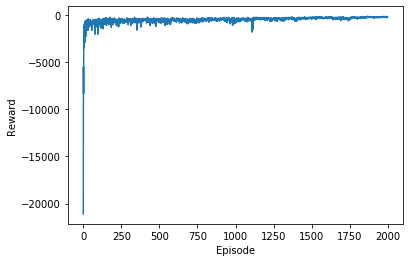

In [23]:
plt.plot(rewards)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.show()

In [24]:
from time import sleep

for i in range(3):
    state = env.reset()
    done = False
    reward_sum = 0
    while not done:
        env.render()
        action = agent.get_greedy_action(state)
        
        state, reward, done, _ = env.step(action)
        reward_sum += reward
 
        sleep(0.01)
    print("Episode finished. Reward={:.4f}".format(reward_sum))

Episode finished. Reward=-170.0000
Episode finished. Reward=-169.0000
Episode finished. Reward=-157.0000
